<a href="https://colab.research.google.com/github/techshot25/BlackFriday/blob/master/BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Friday Shopping Habits
### By Ali J. Shannon


---

In this module, I am going to explore shopping habits of consumers during Black Friday. This will involve some data analysis, statistical analysis, and machine learning to predict consumer spending in USD.

In summary, the data is not correlated so no rows needed to be removed for regression analysis. Random Forest Regression is the best estimator for spending habits with about 80% accuracy.



---

Info about this dataset can be found [here](https://www.kaggle.com/mehdidag/black-friday).

##### Dataset of 550,000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.



In [1]:
# libraries needed for retrieving and orginizing the data along with a statistics library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries by scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


# import data file and show the first 10 rows
df = pd.read_csv('BlackFriday.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## Data cleanup

First I will drop the columns that are not necessary for my analysis. These are: `User_ID` and `Product_ID`.

In [0]:
df = df.drop(columns = ['User_ID', 'Product_ID'])

Here I handle missing values:

In [3]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.354522
Product_Category_2    30.982233
dtype: float64 %


Precetage of missing values in each of these two columns. Displayed as `NaN` in the data frame above.


Replacing missing values with zeros and double checking.

In [4]:
df = df.fillna(0)

missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


Since most of the machine learning methods do not use strings, I will transform `str` or `object` fields to `int`. 

In [5]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Starting from the first feature: `gender`.

In [6]:
gender = np.unique(df['Gender'])
gender

array(['F', 'M'], dtype=object)

Let's map every `F` to `1` and every `M` to `0`

In [0]:
def gender_map(gender):
  if gender == 'F':
    return 1
  else:
    return 0
  
df['Gender'] = df['Gender'].apply(gender_map)

Next we take care of `age`.

In [8]:
age = np.unique(df['Age'])
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [0]:
def age_map(age):
  if age == '0-17':
    return 0
  elif age == '18-25':
    return 1
  elif age == '26-35':
    return 2
  elif age == '36-45':
    return 3
  elif age == '46-50':
    return 4
  elif age == '51-55':
    return 5
  else:
    return 6
  
df['Age'] = df['Age'].apply(age_map)

Following the same pattern with cities

In [10]:
city = np.unique(df['City_Category'])
city

array(['A', 'B', 'C'], dtype=object)

In [0]:
def city_map(city):
  if city == 'A':
    return 0
  elif city == 'B':
    return 1 
  else:
    return 2

df['City_Category'] = df['City_Category'].apply(city_map)

Notice that the `Stay_In_Current_City_Years` is displayed as `4+` which is treated as a string.

In [12]:
stay = np.unique(df['Stay_In_Current_City_Years'])

stay

array(['0', '1', '2', '3', '4+'], dtype=object)

In [13]:
def stay_map(stay):
  if stay == '4+':
    return 4
  else:
    return int(stay)
  
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(stay_map)

df.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,0.0,0.0,8370
1,1,0,10,0,2,0,1,6.0,14.0,15200
2,1,0,10,0,2,0,12,0.0,0.0,1422
3,1,0,10,0,2,0,12,14.0,0.0,1057
4,0,6,16,2,4,0,8,0.0,0.0,7969
5,0,2,15,0,3,0,1,2.0,0.0,15227
6,0,4,7,1,2,1,1,8.0,17.0,19215
7,0,4,7,1,2,1,1,15.0,0.0,15854
8,0,4,7,1,2,1,1,16.0,0.0,15686
9,0,2,20,0,1,1,8,0.0,0.0,7871


Turn the last row into `float` and all the other rows to `int`.

In [0]:
df['Purchase'] = pd.to_numeric(df['Purchase']).astype(float)

for i in range(2,4):
  df[df.columns[-i]] = pd.to_numeric(df[df.columns[-i]]).astype(int)

And we're done, time to do some stats.

## Statistics

Here we are looking at the heatmap for correlation (or correlation matrix). If the data is far too correlated, then some columns could be dropped for machine learning algorithims. As we see, the highest correlation is about 0.31 which is a low correlation.

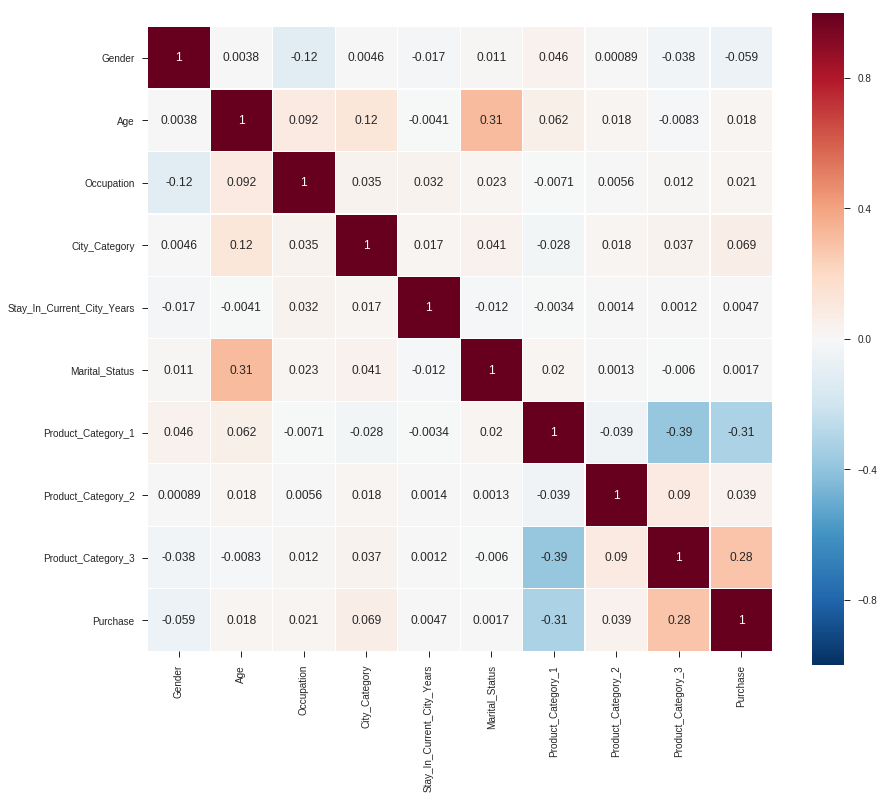

In [15]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(df.astype(float).corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

With this we can deduce that no two data columns are too highly correlated. No columns need dropping.

## Machine Learning (probability analysis)

With this model, I intend to predict purchasing habits based on age, gender, location, and categories.

---

First, we need to split the data into training and testing sets. The training features will be all columns except for `Purchase`, which will be our classifier.

In [0]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

# take out every 5th element for accuracy testing
test_idx = [x for x in range(len(y)) if x%5 == 0]

y_train = np.delete(y, test_idx)
X_train = np.delete(X, test_idx, axis = 0)

y_test = [y[i] for i in test_idx]
X_test = [X[i] for i in test_idx]

Now we start by emplying linear regression from sklearn libraries

In [17]:
rfr = RandomForestRegressor(n_estimators = 100)
rfr = rfr.fit(X, y)

rfr.score(X,y)

0.7935017771121742

In [18]:
linreg = LinearRegression().fit(X, y)

linreg.score(X,y)

0.13496316929437147

The polynomial will attempt to vary the coefficients of $(x_{1}+x_{2}+x_{3}+..)^{n}$ which should estimate if some non-linear combination of at most of $n$ power. First we need to use `PolynomialFeatures(n)` to make a new matrix of features `poly` that involve powers of features that the linear model can use to vary the coefficients.

Using `n=3` gave an accuracy of about 30% which is fairly low but no higher power can bring the accuracy much higher.

In [20]:
poly = PolynomialFeatures(3)
poly = poly.fit_transform(X)

polyreg = LinearRegression().fit(poly, y)
polyreg.score(poly,y)

0.3000320288786188

## Conclusion

It appears that the Random Forest Regressor is the best estimator for spending habits, this data may be used for marketing purposes.